In [2]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import re
import nltk
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
train_data = pd.read_csv("train.txt",header=None,sep=";",names=['Comment','Emotion'],encoding="utf-8")
train_data['length'] = [len(x) for x in train_data['Comment']]

In [4]:
train_data

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [5]:
train_data.shape

(16000, 3)

In [7]:
train_data.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [8]:
train_data.duplicated().sum()

1

In [9]:
train_data.drop_duplicates(inplace=True)

In [10]:
train_data['Emotion'].value_counts()

Emotion
joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

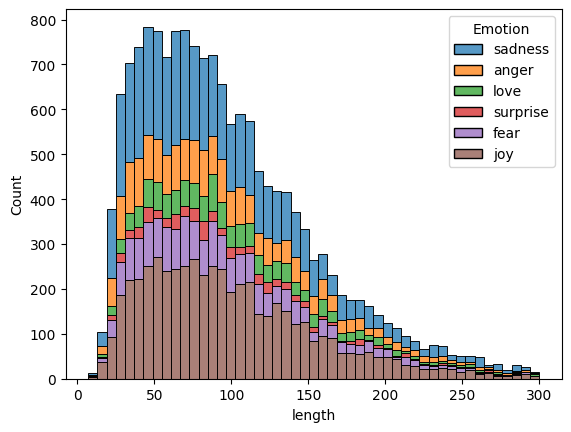

In [11]:
import seaborn as sns
df2 = train_data.copy()
length_values = df2['length'].values
sns.histplot(data=df2,x='length',hue='Emotion',multiple='stack')
plt.show()

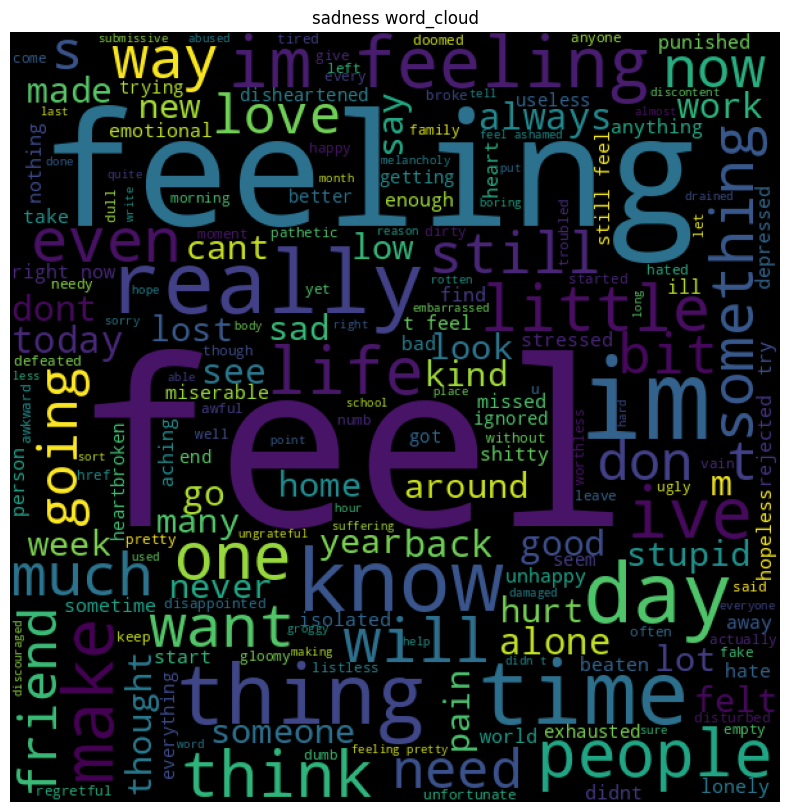

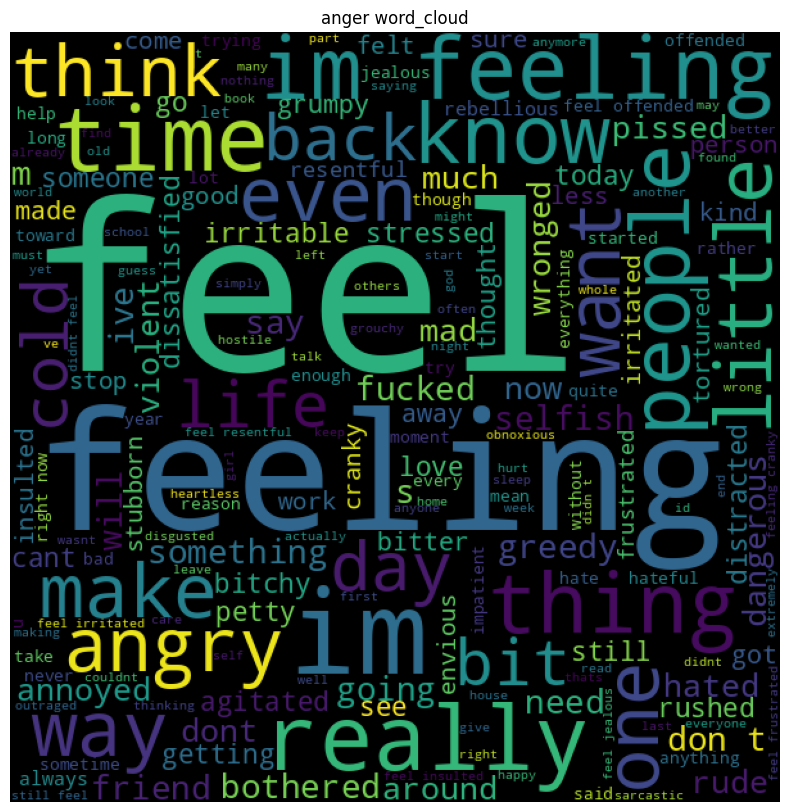

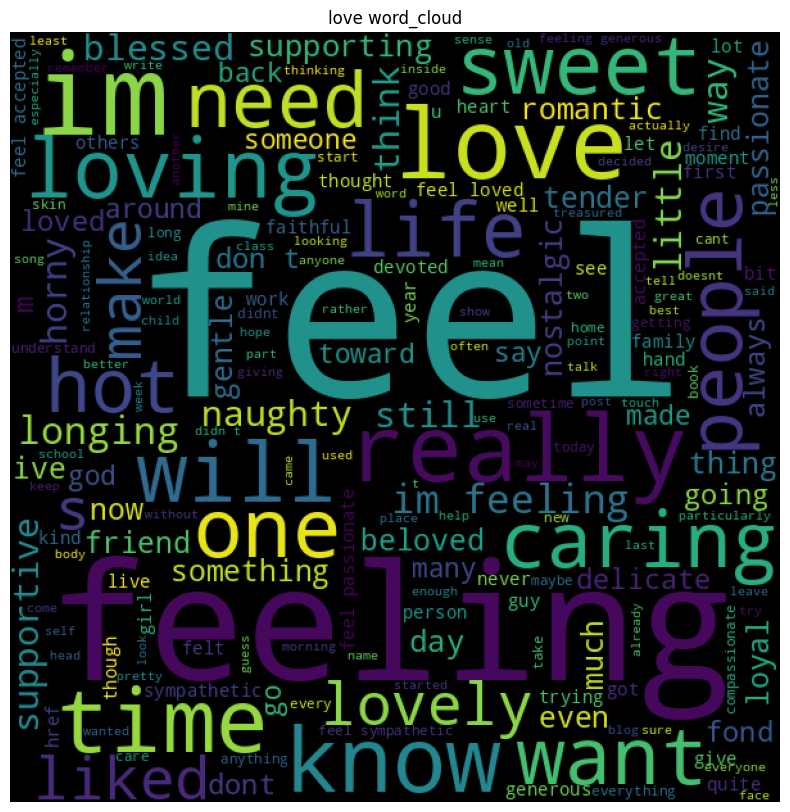

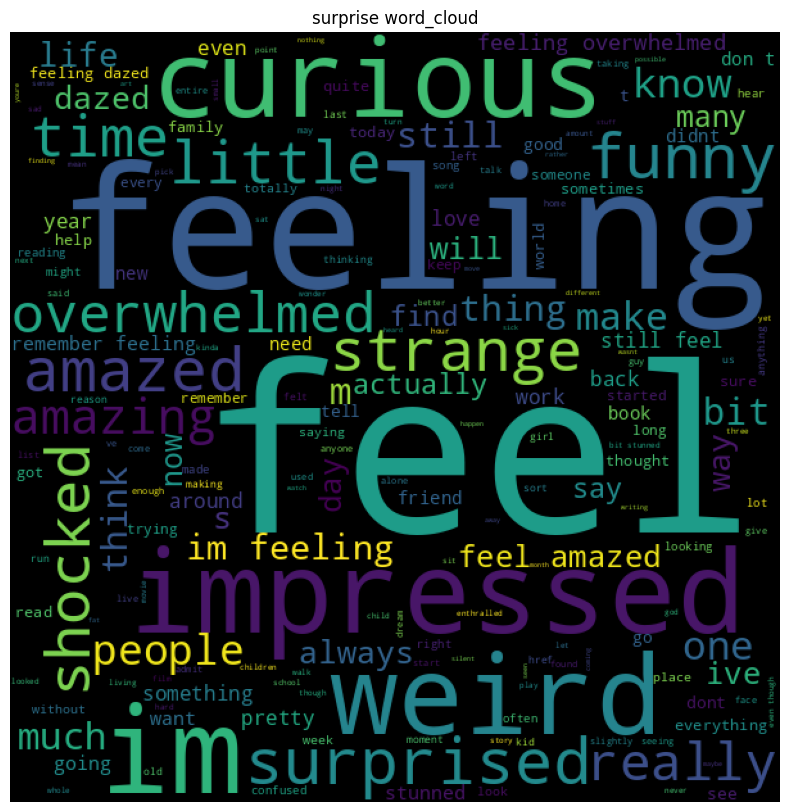

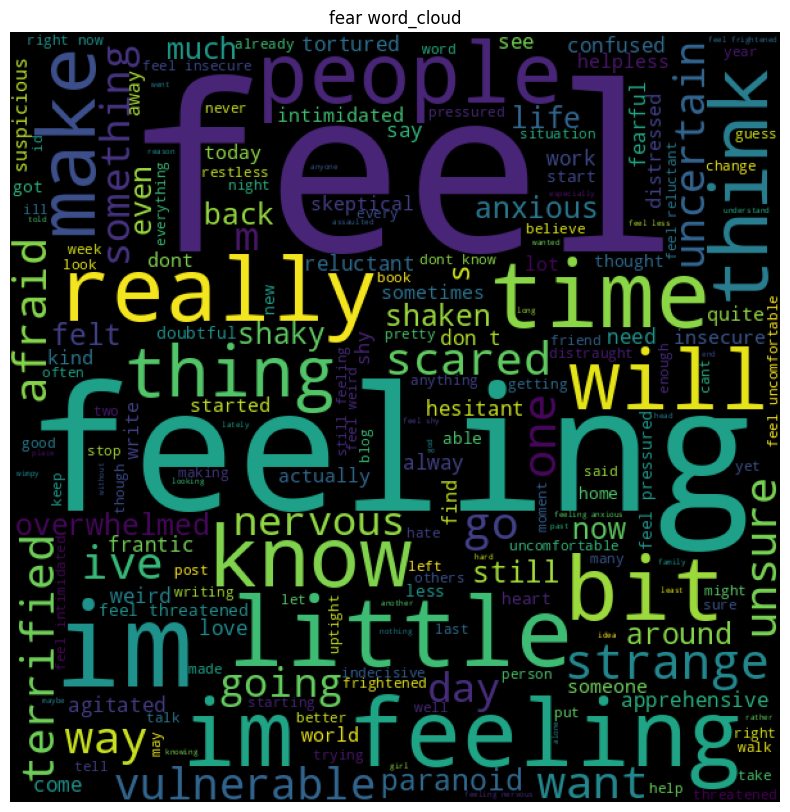

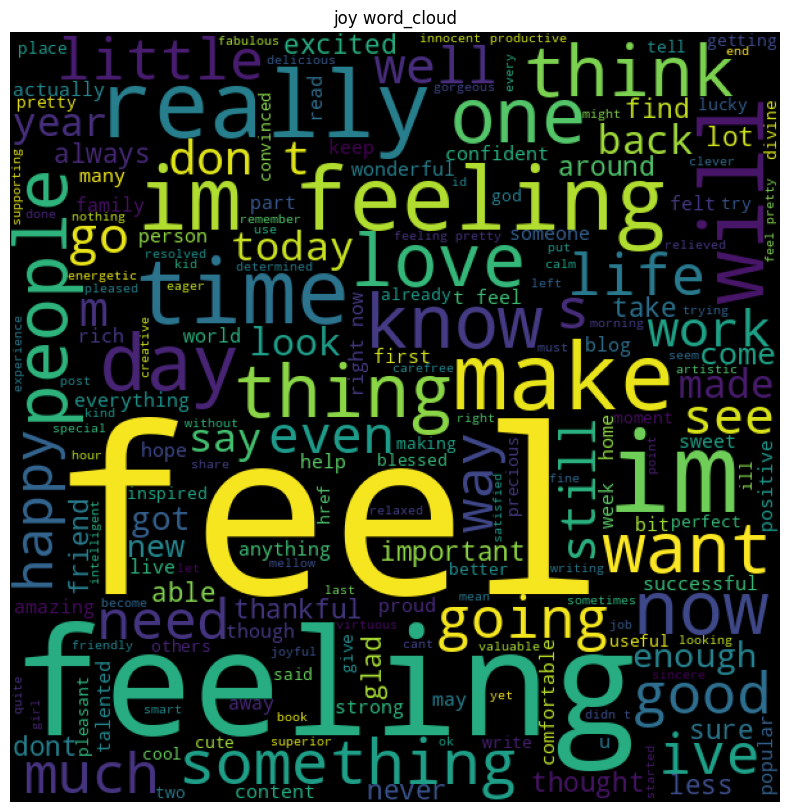

In [12]:
def words_cloud(wordcloud,df):
  plt.figure(figsize=(10,10))
  plt.title(df + " word_cloud")
  plt.imshow(wordcloud)
  plt.axis("off")

emotions_list = train_data['Emotion'].unique()
for emotion in emotions_list:
  text = " ".join([sentence for sentence in train_data.loc[train_data['Emotion'] == emotion,'Comment']])
  wordcloud = WordCloud(width=600,height=600).generate(text)
  words_cloud(wordcloud,emotion)

In [13]:
lb = LabelEncoder()
train_data['Emotion Encoded'] = lb.fit_transform(train_data['Emotion'])

In [14]:
train_data

,Comment,Emotion,length,Emotion Encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [17]:
df = train_data.copy()

In [18]:
df

,Comment,Emotion,length,Emotion Encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [19]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords = stopwords.words('english')

def clean_txt(text):
  stemmer = PorterStemmer()
  text = re.sub("[^a-zA-Z]"," ",text)
  text = text.lower()
  text = text.split()
  text = [stemmer.stem(word) for word in text if word not in stopwords]
  return " ".join(text)
clean_txt("I love eating chinese")
df['cleaned_comment'] = df['Comment'].apply(clean_txt)

[nltk_data] Downloading package stopwords to /home/sonam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df

,Comment,Emotion,length,Emotion Encoded,cleaned_comment
0,i didnt feel humiliated,sadness,23,4,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,108,4,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,48,0,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,92,3,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,20,0,feel grouchi
...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,sadness,102,4,turn feel pathet still wait tabl sub teach degre
15997,i feel strong and good overall,joy,30,2,feel strong good overal
15998,i feel like this was such a rude comment and i...,anger,59,0,feel like rude comment im glad


In [21]:
x_train,x_test,y_train,y_test = train_test_split(df['cleaned_comment'],df['Emotion Encoded'],test_size=0.2,random_state=42)

In [22]:
x_train.shape

(12799,)

In [23]:
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [24]:
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression" : LogisticRegression(),
    "Random Forest" : RandomForestClassifier(),
    "Support Vector Machine" : SVC()
}
for name,clf in classifiers.items():
  print(f"\n========={name}=========")
  clf.fit(x_train_tfidf,y_train)
  y_pred_tfidf = clf.predict(x_test_tfidf)
  # accuracy_tfidf = accuracy_score(y_test,y_pred_tfidf)
  print(f"\nAccuracy using TF-IDF:{accuracy_score(y_test,y_pred_tfidf)}")
  print("Classification Report:")
  print(classification_report(y_test,y_pred_tfidf))


=========Multinomial Naive Bayes=========

Accuracy using TF-IDF:0.6590625
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.32      0.48       439
           1       0.88      0.23      0.37       375
           2       0.58      0.98      0.73      1027
           3       1.00      0.03      0.05       303
           4       0.72      0.91      0.80       950
           5       1.00      0.02      0.04       106

    accuracy                           0.66      3200
   macro avg       0.85      0.42      0.41      3200
weighted avg       0.76      0.66      0.59      3200


=========Logistic Regression=========

Accuracy using TF-IDF:0.825
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       439
           1       0.85      0.72      0.78       375
           2       0.76      0.94      0.84      1027
           3       0.84      0.47      0.60       

In [25]:
lg = LogisticRegression()
lg.fit(x_train_tfidf,y_train)
y_pred_lg = lg.predict(x_test_tfidf)

In [26]:
def predict_emotion(input_text):
  cleaned_text = clean_txt(input_text)
  input_vectorized = tfidf_vectorizer.transform([cleaned_text])
  predicted_label = lg.predict(input_vectorized)[0]
  predicted_emotion = lb.inverse_transform([predicted_label])[0]
  label = np.max(lg.predict(input_vectorized)[0])
  return predicted_emotion,label

sentences = ["i feel humiliated",
             "I am very happy",
             "He is feeling very low and tired"]

for sentence in sentences:
  print(sentence)
  predicted_emotion,label = predict_emotion(sentence)
  print("predicted emotion:" ,predicted_emotion)
  print("predicted label:" ,label)
  print("===========================")


i feel humiliated
predicted emotion: sadness
predicted label: 4
I am very happy
predicted emotion: joy
predicted label: 2
He is feeling very low and tired
predicted emotion: sadness
predicted label: 4


In [27]:
import pickle
pickle.dump(lg,open("logistic_regression.pkl",'wb'))
pickle.dump(lb,open("label_encoder.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf_vectorizer.pkl",'wb'))

In [29]:
def clean_text(df,col,vocab_size,max_len):
  stemmer = PorterStemmer()

  corpus = []
  for text in df[col]:
    text = re.sub("[^a-zA-Z]"," ",text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(w) for w in text if w not in stopwords]
    text = " ".join(text)
    corpus.append(text)
  one_hot_word = [one_hot(input_text=word,n=vocab_size) for word in corpus]
  pad = pad_sequences(sequences=one_hot_word,maxlen=max_len,padding='pre')
  return pad

x_train = clean_text(train_data,'Comment',vocab_size=11000,max_len=300)


In [30]:
x_train

array([[    0,     0,     0, ...,  1282,  2112,  8964],
       [    0,     0,     0, ...,  1943, 10634,  7031],
       [    0,     0,     0, ...,  2112,   129,  6922],
       ...,
       [    0,     0,     0, ...,   964,  7829,  9995],
       [    0,     0,     0, ...,  4064,   748,  1861],
       [    0,     0,     0, ...,  2112,  2799,   401]], dtype=int32)

In [31]:
lb = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])

In [32]:
y_train = to_categorical(train_data['Emotion'])

In [34]:
model = Sequential()
model.add(Embedding(input_dim=11000,output_dim=150))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,batch_size=64,verbose=1)

Epoch 1/5


2024-03-22 18:57:19.343282: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19198800 exceeds 10% of free system memory.


250/250 ━━━━━━━━━━━━━━━━━━━━ 198s 729ms/step - accuracy: 0.3307 - loss: 1.6307
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 181s 700ms/step - accuracy: 0.6523 - loss: 1.0021
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 171s 685ms/step - accuracy: 0.8588 - loss: 0.4728
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 168s 672ms/step - accuracy: 0.9175 - loss: 0.2540
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 172s 688ms/step - accuracy: 0.9429 - loss: 0.1742


In [35]:
def pred(text):
  stemmer = PorterStemmer()

  corpus = []
  text = re.sub("[^a-zA-Z]"," ",text)
  text = text.lower()
  text = text.split()
  text = [stemmer.stem(w) for w in text if w not in stopwords]
  text = " ".join(text)
  corpus.append(text)
    
  one_hot_word = [one_hot(input_text=word,n=11000) for word in corpus]
  pad = pad_sequences(sequences=one_hot_word,maxlen=300,padding='pre')
  return pad


sentences = [
    'I love mangoes',
    'Hina doesnot like to eat junk food',
    'He is really sweet and caring'
]
for sent in sentences:
  clean_sent = pred(sent)
  emotions = lb.inverse_transform(np.argmax(model.predict(clean_sent),axis=-1))[0]
  print(emotions)
  label = np.max(model.predict(clean_sent))
  print(label)
  print("=========================")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
joy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
0.3911764
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
0.9224058
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
love
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
0.523804


In [36]:
model.save('model.h5')